In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('../data/steam.csv')

In [251]:
print(df.shape)
df.head()

(27075, 18)


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [252]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


In [253]:
# Convert owners range
def owners_to_num(x):
    low, high = x.split("-")
    return (int(low) + int(high)) / 2

df["owners_num"] = df["owners"].apply(owners_to_num)

In [254]:
top10_playtime = df.nlargest(10, "average_playtime")[["name", "average_playtime"]]
top10_playtime

,name,average_playtime
9201,The Abbey of Crime Extensum,190625
1478,The Banner Saga: Factions,95245
6014,The Secret of Tremendous Corporation,95242
8969,PRICE,63481
3930,Boundless,55204
3969,Shroud of the Avatar: Forsaken Virtues,54618
2435,X-Plane 11,44169
23409,懒人修仙传,43632
2023,Fantasy Grounds,43074
8919,Screeps,38805


In [255]:
# drop the outlier game
df = df.drop(df["average_playtime"].idxmax())

<Axes: xlabel='average_playtime', ylabel='Count'>

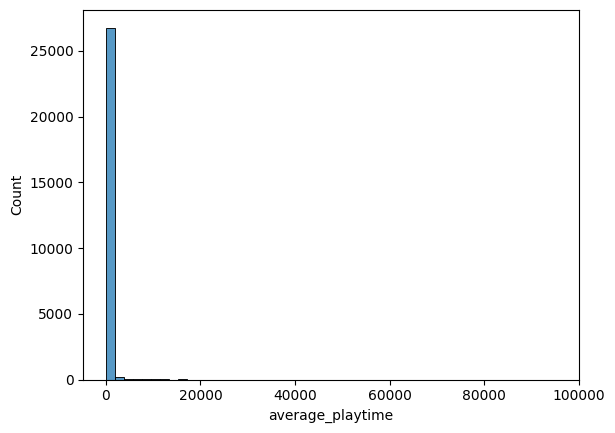

In [256]:
sns.histplot(df["average_playtime"], bins=50)

<Axes: xlabel='average_playtime', ylabel='Count'>

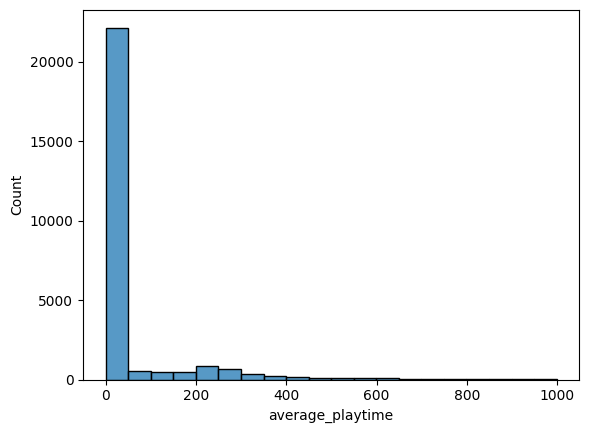

In [257]:
df_filter = df[df["average_playtime"] < 1000]
sns.histplot(df_filter["average_playtime"], bins=20)


In [258]:
# Column for free games
# df['is_free'] = df['price'].apply(lambda x: 1 if x==0 else 0)

In [259]:
# Convert release_date to datetime
df["release_date"] = pd.to_datetime(df["release_date"])
df["release_date"].head()

0   2000-11-01
1   1999-04-01
2   2003-05-01
3   2001-06-01
4   1999-11-01
Name: release_date, dtype: datetime64[ns]

In [260]:
df['total_ratings'] = df['positive_ratings'] + df['negative_ratings']

In [261]:
df['avg_playtime_per_owner'] = df['average_playtime'] / df['owners_num']

In [262]:
# days_since_release already created above
df = df.drop(columns=["appid", "name", "owners", "release_date", "price", "publisher", "developer", "platforms"])

In [263]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns

print("Numeric columns:", num_cols.tolist())
print("Categorical columns:", cat_cols.tolist())

Numeric columns: ['english', 'required_age', 'achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'owners_num', 'total_ratings', 'avg_playtime_per_owner']
Categorical columns: ['categories', 'genres', 'steamspy_tags']


In [264]:
# Normalize numerical data

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [265]:
# encoding categorical data

df[cat_cols] = df[cat_cols].fillna("unknown")

# Take only first tag
for col in cat_cols:
    df[col] = df[col].apply(lambda x: x.split(";")[0] if ";" in x else x)

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[cat_cols])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols))


In [266]:
encoded_df.shape

(27074, 255)

In [267]:
# Merge numerical and encoded categorical data
df_preprocessed = pd.concat([df[num_cols], encoded_df], axis=1).dropna()

In [268]:
df_preprocessed.info()


<class 'pandas.core.frame.DataFrame'>
Index: 27073 entries, 0 to 27073
Columns: 265 entries, english to steamspy_tags_Zombies
dtypes: float64(265)
memory usage: 54.9 MB


In [269]:
X = df_preprocessed

df_preprocessed.head()

,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners_num,total_ratings,avg_playtime_per_owner,...,steamspy_tags_Walking Simulator,steamspy_tags_Wargame,steamspy_tags_Warhammer 40K,steamspy_tags_Web Publishing,steamspy_tags_Western,steamspy_tags_Word Game,steamspy_tags_World War I,steamspy_tags_World War II,steamspy_tags_Wrestling,steamspy_tags_Zombies
0,1.0,0.0,0.0,0.047093,0.006855,0.184913,0.001664,0.099940,0.041970,0.000464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.001255,0.001300,0.002908,0.000325,0.049937,0.001296,0.000015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.001292,0.000817,0.001963,0.000178,0.049937,0.001252,0.000010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.000481,0.000548,0.002709,0.000966,0.049937,0.000505,0.000014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.001985,0.000591,0.006552,0.002179,0.049937,0.001817,0.000033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
